# Using Histogram Equalization (HE) to achieve better quality images

# ***Low Contrast Approach***

In [1]:
# Importing Libraries

import cv2
import numpy as np
import matplotlib.pyplot as plt

### Histogram Plotting Function

##### This function (plot_histogram) takes an image, a title, an index, and a flag as parameters. It calculates and displays both the image and its corresponding histogram using Matplotlib.

In [2]:
def plot_histogram(image, title, index, flag):

    hist, bins = np.histogram(image.flatten(), 256, [0, 256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max() / cdf.max()

    plt.subplot(4, 2, index)
    plt.imshow(image, cmap='gray')
    plt.title(f'Image - {title}')
    plt.xticks([]), plt.yticks([])

    plt.subplot(4, 2, index+2)
    plt.plot(cdf_normalized, color='b')
    plt.hist(image.flatten(), 256, [0, 256], color='r')
    plt.title(f'Histogram - {title}')
    plt.xticks([]), plt.yticks([])

    if flag == 1:
      plt.show()

### Histogram Equalization Function

##### The function "histogram_equalization" takes an image as input, performs histogram equalization, and returns the equalized image. Histogram equalization enhances the contrast of an image by redistributing pixel intensities, resulting in a more balanced and visually appealing representation.

In [3]:
def histogram_equalization(image):
    hist, bins = np.histogram(image.flatten(), 256, [0, 256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max() / cdf.max()

    cdf_m = np.ma.masked_equal(cdf, 0)
    cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
    cdf = np.ma.filled(cdf_m, 0).astype('uint8')

    equalized_image = cdf[image]

    return equalized_image

In [4]:
# Reading Images

image1 = cv2.imread('coin1.jpg', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('coin2.jpg', cv2.IMREAD_GRAYSCALE)

In [5]:
# Applying HE (Histogram Equalization) on the two images

equalized_image1 = histogram_equalization(image1)
equalized_image2 = histogram_equalization(image2)

### Plotting Images before and after equalization

##### A side-by-side visualization of the original and equalized images is created along with their corresponding histograms for both 'coin1' and 'coin2'.

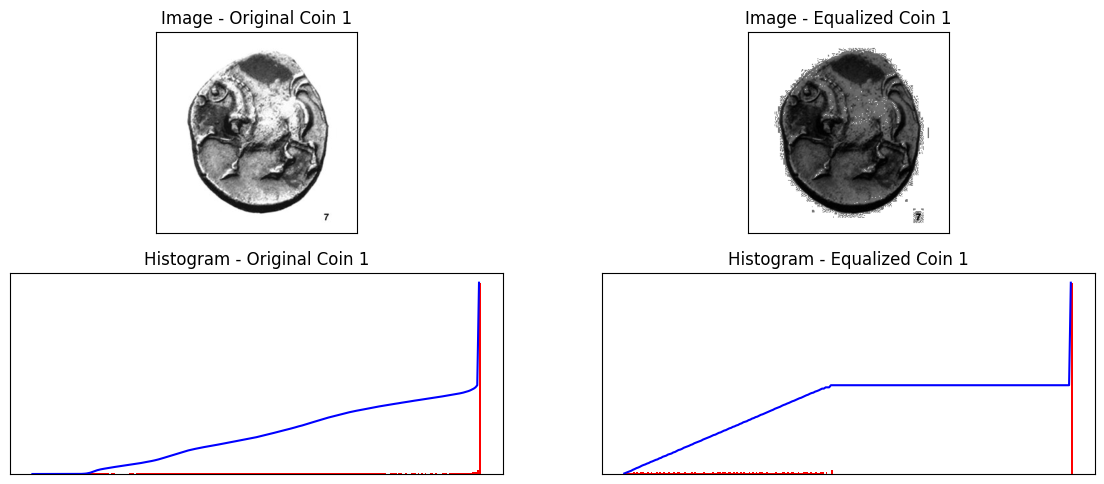

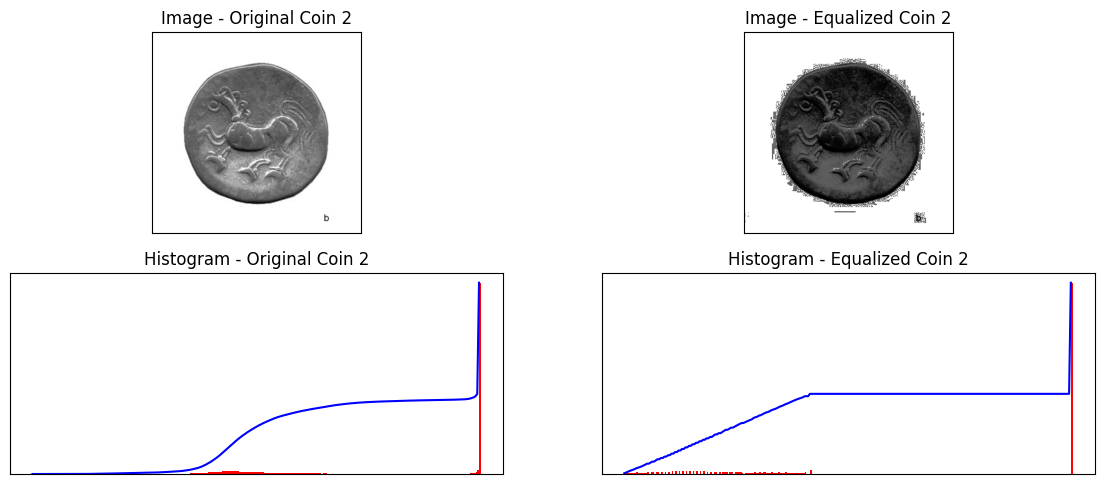

In [6]:
plt.figure(figsize=(14,12))
plot_histogram(image1, 'Original Coin 1', 1, 0)
plot_histogram(equalized_image1, 'Equalized Coin 1', 2, 1)
print()
print()
plt.figure(figsize=(14,12))
plot_histogram(image2, 'Original Coin 2', 3, 0)
plot_histogram(equalized_image2, 'Equalized Coin 2', 4, 1)

# Using Contrast Limited Adaptive Histogram Equalization (CLAHE) to improve image contrast

# ***High Contrast Approach***


In [7]:
# Importing Libraries

import cv2
import numpy as np
import matplotlib.pyplot as plt

### Histogram Plotting Function

##### The function "plot_histogram" takes an image, a title, an index, and a flag as parameters. The function calculates and displays both the image and its corresponding histogram using Matplotlib. This facilitates a visual comparison between the original image and its histogram, aiding in the analysis of pixel intensity distribution.

In [8]:
def plot_histogram(image, title, index, flag):
    hist, bins = np.histogram(image.flatten(), 256, [0, 256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max() / cdf.max()

    plt.subplot(4, 2, index)
    plt.imshow(image, cmap='gray')
    plt.title(f'Image - {title}')
    plt.xticks([]), plt.yticks([])

    plt.subplot(4, 2, index+2)
    plt.plot(cdf_normalized, color='b')
    plt.hist(image.flatten(), 256, [0, 256], color='r')
    plt.title(f'Histogram - {title}')
    plt.xticks([]), plt.yticks([])

    if flag == 1:
      plt.show()

### Applying Contrast Limited Adaptive Histogram Equalization (CLAHE)

##### "apply_clahe" function is defined to perform Contrast Limited Adaptive Histogram Equalization (CLAHE) on an input image.

##### CLAHE enhances local contrast by adapting the histogram in small regions defined by the specified tile size and clip limit parameters.

In [9]:
def apply_clahe(image, tile_size, clip_limit):
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=(tile_size, tile_size))
    equalized_image = clahe.apply(image)
    return equalized_image

In [10]:
# Reading Images
image1 = cv2.imread('coin1.jpg', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('coin2.jpg', cv2.IMREAD_GRAYSCALE)

In [11]:
# Applying CLAHE (Contrast Limited Adaptive Histogram Equalization) on the two images

clahe_image1 = apply_clahe(image1, tile_size=8, clip_limit=2.0)
clahe_image2 = apply_clahe(image2, tile_size=8, clip_limit=2.0)

### Plotting Images before and after equalization
##### A side-by-side visualization of the original and equalized images is created along with their corresponding histograms for both 'coin1' and 'coin2'.

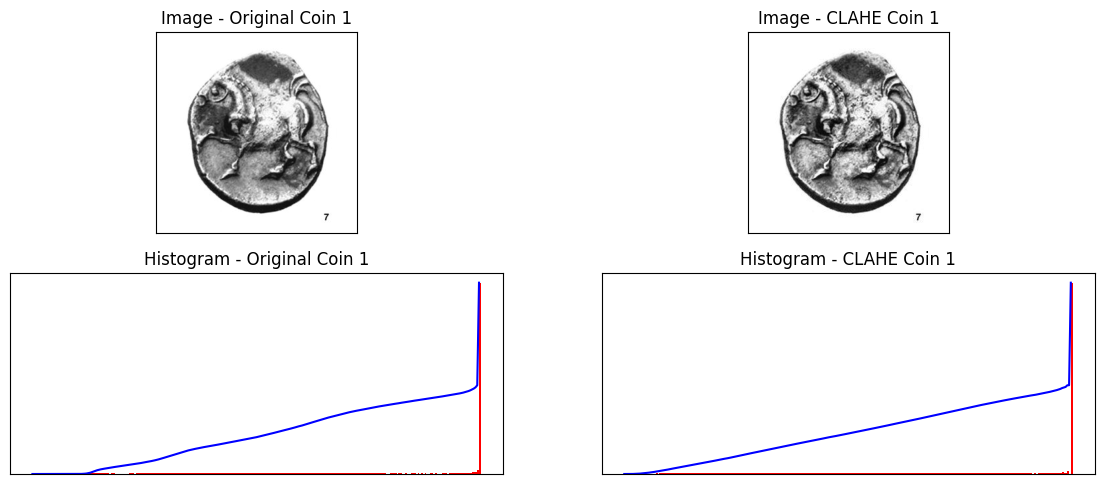

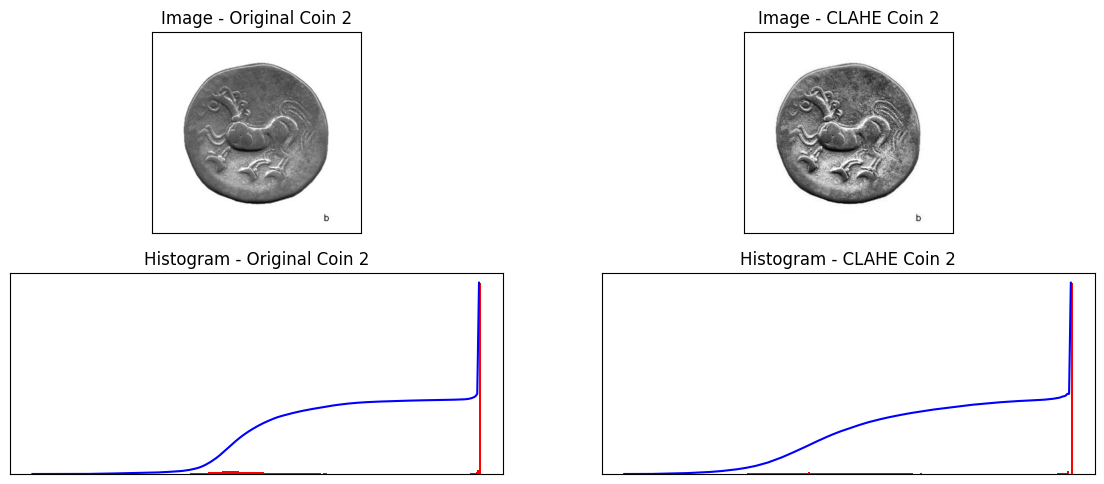

In [12]:
plt.figure(figsize=(14,12))
plot_histogram(image1, 'Original Coin 1', 1, 0)
plot_histogram(clahe_image1, 'CLAHE Coin 1', 2, 1)
print()
print()
plt.figure(figsize=(14,12))
plot_histogram(image2, 'Original Coin 2', 3, 0)
plot_histogram(clahe_image2, 'CLAHE Coin 2', 4, 1)

## Conclusion

#### After applying the two algorithms - "Histogram Equalization (HE)" and "Contrast Limited Adaptive Histogram Equalization (CLAHE)" - on the two images, it is clear that (CLAHE) gets us better results than (HE) due to the high contrast between the grayscale intensities in the two images such as the coin itself and the white background.